1) Data Cleaning 

In [ ]:
import seaborn as sns, pandas as pd, numpy as np

In [ ]:
import pandas as pd

data=pd.read_csv('./Datasets/Data science Salaries 2023/ds_salaries.csv')

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [166]:
# Set float display option
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Now describe the data
data['salary'].describe()

count       3755.00
mean      190695.57
std       671676.50
min         6000.00
25%       100000.00
50%       138000.00
75%       180000.00
max     30400000.00
Name: salary, dtype: float64

1.1) Duplicates

In [212]:
print("Origina data shape:", data.shape)


# Para analizar duplicados en cada columna (característica), puedes usar el siguiente código:
duplicates_per_feature = {}
for column in data.columns:
    duplicates = data[column][data[column].duplicated()]
    duplicates_per_feature[column] = duplicates

# Imprime los duplicados por característica
for column, duplicates in duplicates_per_feature.items():
    if not duplicates.empty:
        print(f"Duplicados en la característica '{column}':")
        print(duplicates)
        print()




Origina data shape: (3755, 108)
Duplicados en la característica 'work_year':
1       2023
2       2023
3       2023
4       2023
5       2023
        ... 
3750    2020
3751    2021
3752    2020
3753    2020
3754    2021
Name: work_year, Length: 3751, dtype: int64

Duplicados en la característica 'experience_level':
2       MI
3       SE
4       SE
5       SE
6       SE
        ..
3750    SE
3751    MI
3752    EN
3753    EN
3754    SE
Name: experience_level, Length: 3751, dtype: object

Duplicados en la característica 'salary':
15       147100
16        90700
19       150000
28       130000
32        90700
         ...   
3749     165000
3751     151000
3752     105000
3753     100000
3754    7000000
Name: salary, Length: 2940, dtype: int64

Duplicados en la característica 'salary_currency':
2       USD
3       USD
4       USD
5       USD
6       USD
       ... 
3750    USD
3751    USD
3752    USD
3753    USD
3754    INR
Name: salary_currency, Length: 3735, dtype: object

Duplicados en 

In [168]:
# Lista de características que deseas excluir
excluded_features = ['salary','salary_currency','salary_in_usd']  # Reemplaza con los nombres de las características que deseas excluir

# Itera a través de las características y muestra los valores únicos, excluyendo las características especificadas
for column in data.columns:
    if column not in excluded_features:
        unique_values = data[column].unique()
        print(f"Valores únicos en la característica '{column}':")
        for value in unique_values:
            print(value)
        print()

Valores únicos en la característica 'work_year':
2023
2022
2020
2021

Valores únicos en la característica 'experience_level':
SE
MI
EN
EX

Valores únicos en la característica 'employment_type':
FT
CT
FL
PT

Valores únicos en la característica 'job_title':
Principal Data Scientist
ML Engineer
Data Scientist
Applied Scientist
Data Analyst
Data Modeler
Research Engineer
Analytics Engineer
Business Intelligence Engineer
Machine Learning Engineer
Data Strategist
Data Engineer
Computer Vision Engineer
Data Quality Analyst
Compliance Data Analyst
Data Architect
Applied Machine Learning Engineer
AI Developer
Research Scientist
Data Analytics Manager
Business Data Analyst
Applied Data Scientist
Staff Data Analyst
ETL Engineer
Data DevOps Engineer
Head of Data
Data Science Manager
Data Manager
Machine Learning Researcher
Big Data Engineer
Data Specialist
Lead Data Analyst
BI Data Engineer
Director of Data Science
Machine Learning Scientist
MLOps Engineer
AI Scientist
Autonomous Vehicle Technicia

1.2) Missing Values

In [90]:
# Check for missing values in each column
missing_values = data.isnull().sum()

missing_values


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

1.3) Outliers

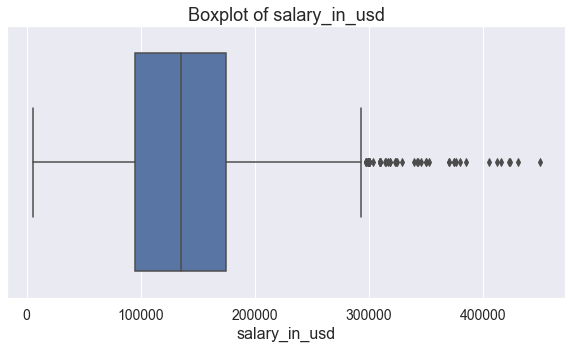

In [213]:



# Boxplot of 'salary_in_usd'
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['salary_in_usd'])
plt.title('Boxplot of salary_in_usd')
plt.show()


In [214]:
from scipy.stats import zscore

# Calculate Z-scores
data['zscore'] = zscore(data['salary_in_usd'])

# Remove outliers
data = data[(data['zscore'] > -3) & (data['zscore'] < 3)]

# Check the shape of the new dataframe
data['salary_in_usd'].describe()
data.shape


(3733, 109)

# 2.) EDA

In [56]:
# Get value counts for each column
value_counts = {col: data[col].value_counts() for col in data.columns}

print(value_counts)


{'work_year': 2023    1774
2022    1657
2021     228
2020      74
Name: work_year, dtype: int64, 'experience_level': SE    2501
MI     801
EN     320
EX     111
Name: experience_level, dtype: int64, 'employment_type': FT    3697
PT      17
FL      10
CT       9
Name: employment_type, dtype: int64, 'job_title': Data Engineer                          1040
Data Scientist                          837
Data Analyst                            610
Machine Learning Engineer               288
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Marketing Data Engineer                   1
Manager Data Management                   1
Finance Data Analyst                      1
Name: job_title, Length: 92, dtype: int64, 'salary': 100000    112
150000    100
120000     99
130000     85
160000     85
         ... 
284000      1
140800      1
216100      1
133832      1
130800     

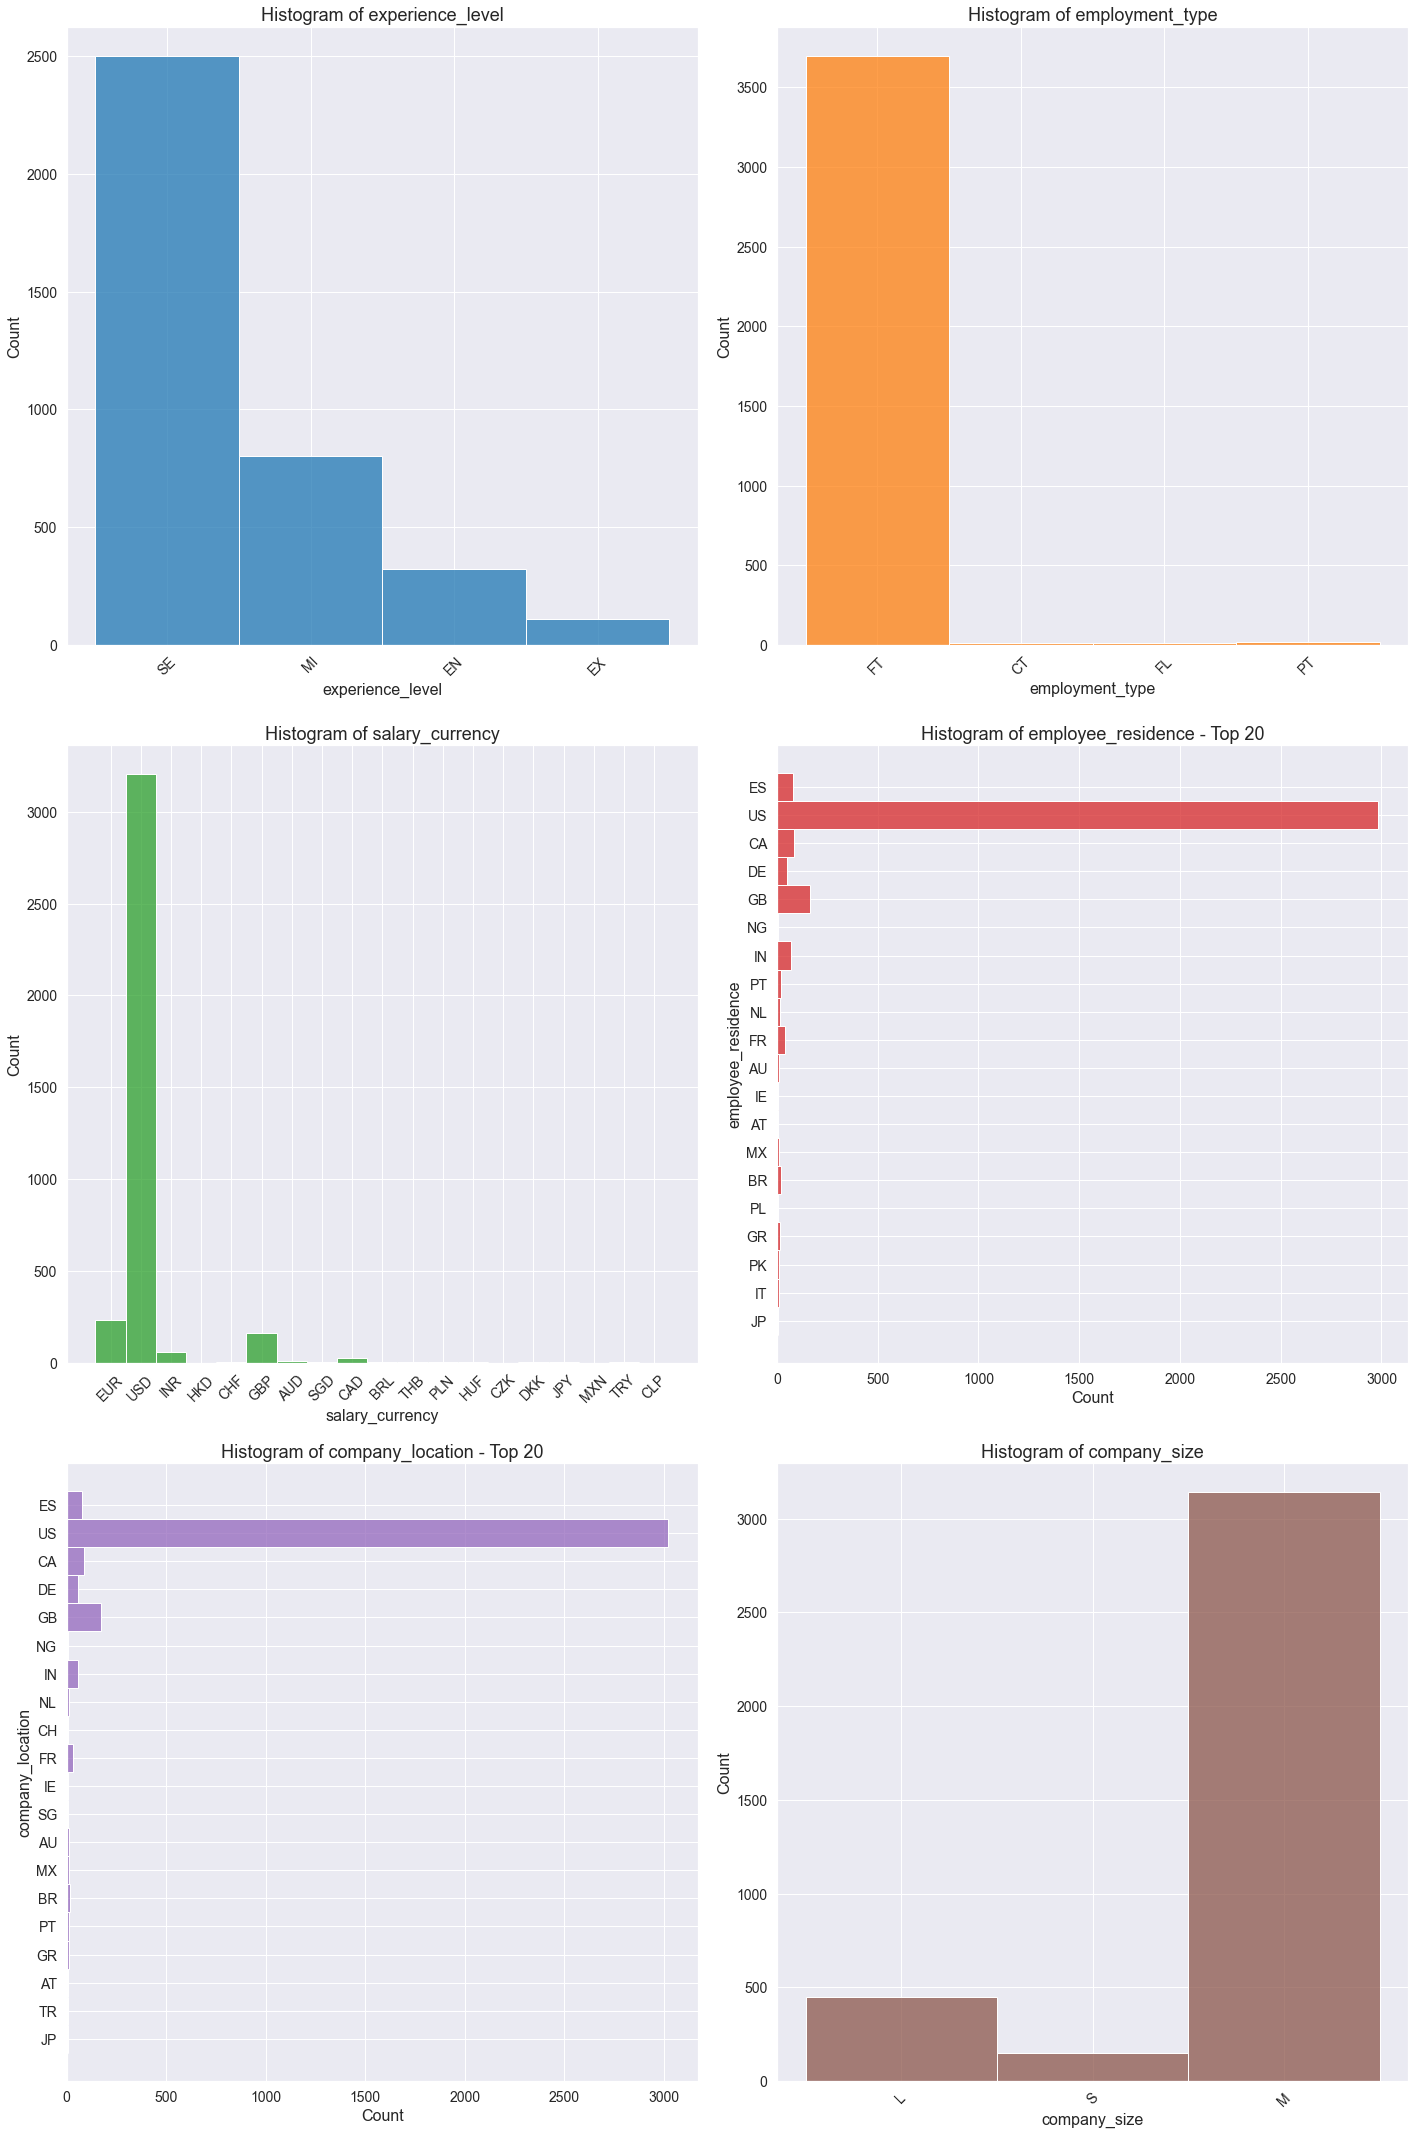

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'data' es tu DataFrame...

# Selecciona columnas de tipo 'object'
object_columns = data.select_dtypes('object').columns

# Elimina 'job_title' de la lista de columnas
object_columns = object_columns.drop('job_title') if 'job_title' in object_columns else object_columns

# Colores distintos para cada histograma
colors = plt.cm.tab10.colors

# Ajusta el tamaño de fuente para Seaborn y Matplotlib
sns.set(font_scale=1.5)  # Incrementa el tamaño de fuente predeterminado en 1.5 veces
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

# Determina el número de filas para los subplots
num_rows = -(-len(object_columns) // 2)

fig, axs = plt.subplots(num_rows, 2, figsize=(20, 30))

# Asegura que 'axs' siempre sea un array 2D, incluso si tiene una sola fila
if num_rows == 1:
    axs = np.expand_dims(axs, axis=0)

for i, col in enumerate(object_columns):
    row = i // 2
    col_index = i % 2
    
    # Para las columnas 'employee_residence' y 'company_location', plotea verticalmente
    if col in ['employee_residence', 'company_location']:
        top_20_values = data[col].value_counts().nlargest(20).index
        sns.histplot(data[data[col].isin(top_20_values)], y=col, ax=axs[row, col_index], bins=30, color=colors[i % len(colors)])
        axs[row, col_index].set_title(f'Histogram of {col} - Top 20', fontsize=18)
    else:
        sns.histplot(data[col], ax=axs[row, col_index], kde=False, bins=30, color=colors[i % len(colors)])
        axs[row, col_index].set_title(f'Histogram of {col}', fontsize=18)
        for tick in axs[row, col_index].get_xticklabels():
            tick.set_rotation(45)
    
    # Guarda el histograma actual como imagen PNG
    fig.savefig(f"Histogram_{col}.png", bbox_inches='tight')

# Si el número de gráficos es impar, elimina el último eje vacío
if len(object_columns) % 2 != 0:
    fig.delaxes(axs[row, 1])

plt.tight_layout()
plt.show()






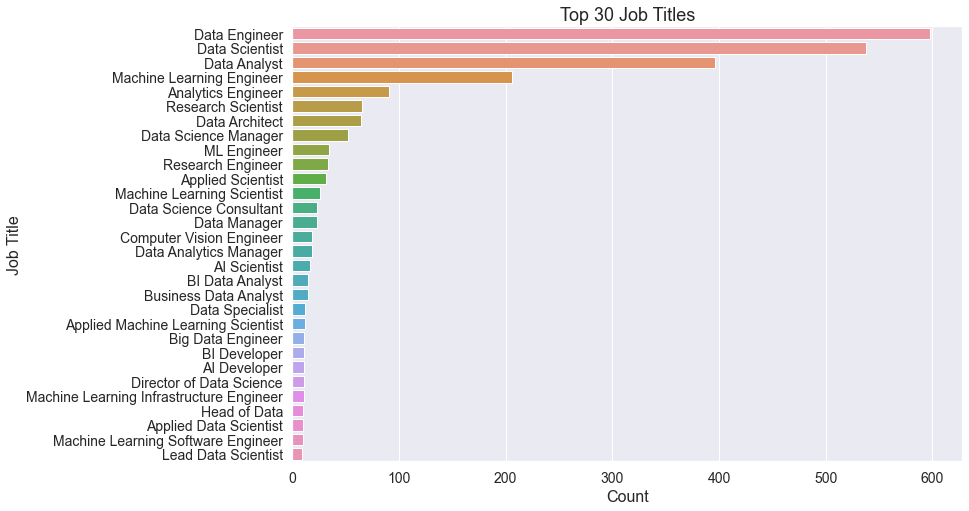

In [58]:
# Count values for 'job_title' and get the top 30
job_title_counts = data_clean['job_title'].value_counts().nlargest(30)

# Plot a bar chart for the top 30 job titles
plt.figure(figsize=(12, 8))
sns.barplot(y=job_title_counts.index, x=job_title_counts.values, orient='h')
plt.title('Top 30 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()




2.2) Numerical Values

2.2.1) Scatter Plots

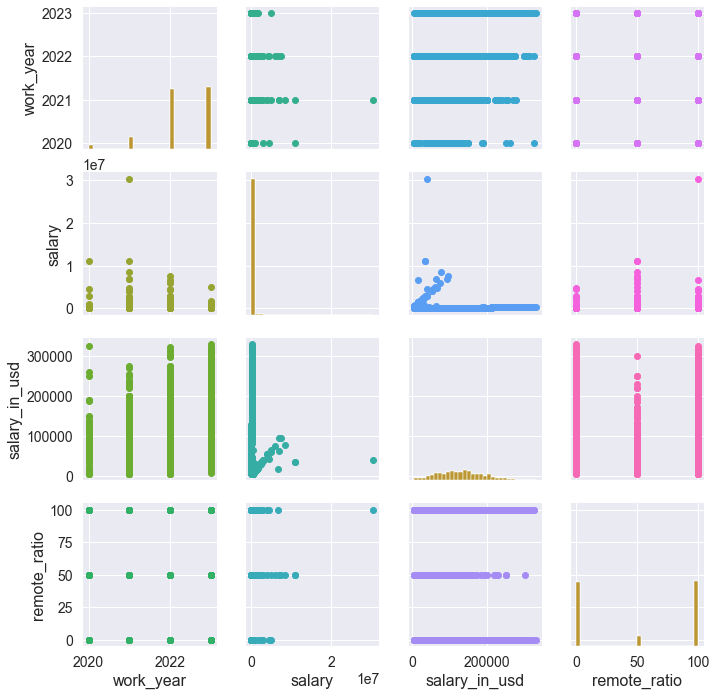

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que 'data_clean' es tu DataFrame...

numeric_columns = data_clean.select_dtypes(include=['int64', 'float64']).columns

# Eliminar columna 'zscore'
numeric_columns = numeric_columns.drop('zscore') if 'zscore' in numeric_columns else numeric_columns

# Inicializa el PairGrid
g = sns.PairGrid(data_clean[numeric_columns])

# Define la cantidad total de plots y crea una paleta de colores adecuada
total_plots = len(numeric_columns) ** 2
colors = sns.color_palette("husl", n_colors=total_plots)

color_index = 0

# Mapea los histogramas en la diagonal
for i, column in enumerate(numeric_columns):
    g.map_diag(sns.histplot, kde=False, bins=30, color=colors[color_index])
    color_index += 1

# Mapea los scatter plots fuera de la diagonal
for i, col_var in enumerate(numeric_columns):
    for j, row_var in enumerate(numeric_columns):
        if col_var != row_var:
            g.axes[j, i].scatter(data_clean[col_var], data_clean[row_var], color=colors[color_index])
            color_index += 1

plt.show()




2.2.2) Heatmaps

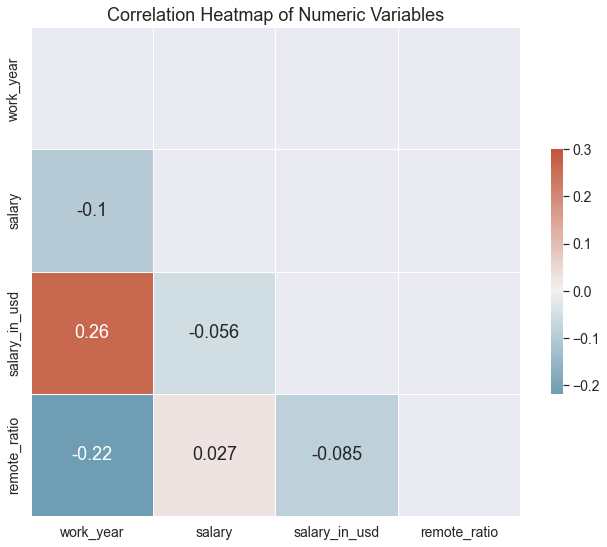

In [16]:
# Compute the correlation matrix
corr = data_clean[numeric_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


2.2.3) Descriptive Statistics

In [17]:
descriptive_stats = data_clean[numeric_columns].describe()

descriptive_stats

,work_year,salary,salary_in_usd,remote_ratio
count,2563.00,2563.00,2563.00,2563.00
mean,2022.30,208573.13,131374.87,50.55
std,0.75,810804.45,63450.98,48.17
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,90000.00,84053.00,0.00
50%,2022.00,134000.00,129300.00,50.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,329500.00,100.00
